In [1]:
%load_ext autoreload
%autoreload 2
from plot_hyperparameter import  plot_results_assessment
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import os
from pathlib import Path
import itertools
import string

import pandas as pd

In [2]:
results_columns = ["Model", "Accuracy", "Precision", "Recall", "F1"]

results = pd.DataFrame(columns=results_columns )
results["Model"] = ["Isolation Forest", "Local Outlier Probability", "DB Scan", "Own Algorithm"]
print(results)

alphabet = list(string.ascii_uppercase)
perc_columns = ["Letter", "Isolation Forest", "Local Outlier Probability", "DB Scan", "Own Algorithm"]
percentages = pd.DataFrame(columns=perc_columns) 
percentages["Letter"] = alphabet + ["Total"]
#columns for recieving the percentages

percentages_columns = alphabet + ["Total"]
percentages

                       Model Accuracy Precision Recall   F1
0           Isolation Forest      NaN       NaN    NaN  NaN
1  Local Outlier Probability      NaN       NaN    NaN  NaN
2                    DB Scan      NaN       NaN    NaN  NaN
3              Own Algorithm      NaN       NaN    NaN  NaN


,Letter,Isolation Forest,Local Outlier Probability,DB Scan,Own Algorithm
0,A,NaN,NaN,NaN,NaN
1,B,NaN,NaN,NaN,NaN
2,C,NaN,NaN,NaN,NaN
3,D,NaN,NaN,NaN,NaN
4,E,NaN,NaN,NaN,NaN
5,F,NaN,NaN,NaN,NaN
6,G,NaN,NaN,NaN,NaN
7,H,NaN,NaN,NaN,NaN
8,I,NaN,NaN,NaN,NaN
9,J,NaN,NaN,NaN,NaN


# Isolation Forest

In [3]:
path_iso_for = Path("../../Data/Output_Data/02_Results_Ifor/Ifor_rel.csv").absolute()
path_db_scan = Path("../../Data/Output_Data/03_DBScan/result_DBSCAN_per_3std_4,16%.csv")
path_lop = Path("../../Data/Output_Data/04_Local_outlier_prob/results_lop_per_3std_4,16%_06_07.csv")

path_iso_val = Path("../../Data/Output_Data/02_Results_Ifor/Ifor_val.csv").absolute()

iso_for = pd.read_csv(path_iso_for)
db_scan = pd.read_csv(path_db_scan)
lop = pd.read_csv(path_lop)
#iso_for.sort_values(by="accuracy", ascending=False).head()

In [4]:
db_scan.columns = ['Unnamed: 0', '_', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
       'Y', 'Z', 'Total', 'f1', 'accuracy', 'precision', 'recall']

In [6]:
results.loc[results["Model"]=="Isolation Forest", ["Accuracy", "Precision",  "Recall",  "F1"]]  = list(iso_for.loc[iso_for["f1"].idxmax(), ['accuracy', 'precision', 'recall', 'f1']])
percentages["Isolation Forest"] = list(iso_for.loc[iso_for["f1"].idxmax(), percentages_columns])
results.loc[results["Model"]=="DB Scan", ["Accuracy", "Precision",  "Recall",  "F1"]]  = list(db_scan.loc[db_scan["f1"].idxmax(), ['accuracy', 'precision', 'recall', 'f1']])
percentages["DB Scan"] = list(db_scan.loc[db_scan["f1"].idxmax(), percentages_columns])
results.loc[results["Model"]=="Local Outlier Probability", ["Accuracy", "Precision",  "Recall",  "F1"]]  = list(lop.loc[lop["f1"].idxmax(), ['accuracy', 'precision', 'recall', 'f1']])
percentages["Local Outlier Probability"] = list(db_scan.loc[lop["f1"].idxmax(), percentages_columns])
print(results)
print(percentages)

                       Model Accuracy Precision    Recall        F1
0           Isolation Forest  0.86562  0.058275   0.15625   0.08489
1  Local Outlier Probability   0.9801  0.747153  0.788462  0.767251
2                    DB Scan  0.86765  0.192685  0.683894  0.300661
3              Own Algorithm      NaN       NaN       NaN       NaN
   Letter  Isolation Forest  Local Outlier Probability   DB Scan Own Algorithm
0       A          0.069620                   0.150824  0.150824           NaN
1       B          0.077922                   0.168407  0.168407           NaN
2       C          0.202703                   0.043478  0.043478           NaN
3       D          0.111801                   0.175155  0.175155           NaN
4       E          0.058442                   0.018229  0.018229           NaN
5       F          0.103226                   0.158710  0.158710           NaN
6       G          0.103226                   0.104787  0.104787           NaN
7       H          0.136054 

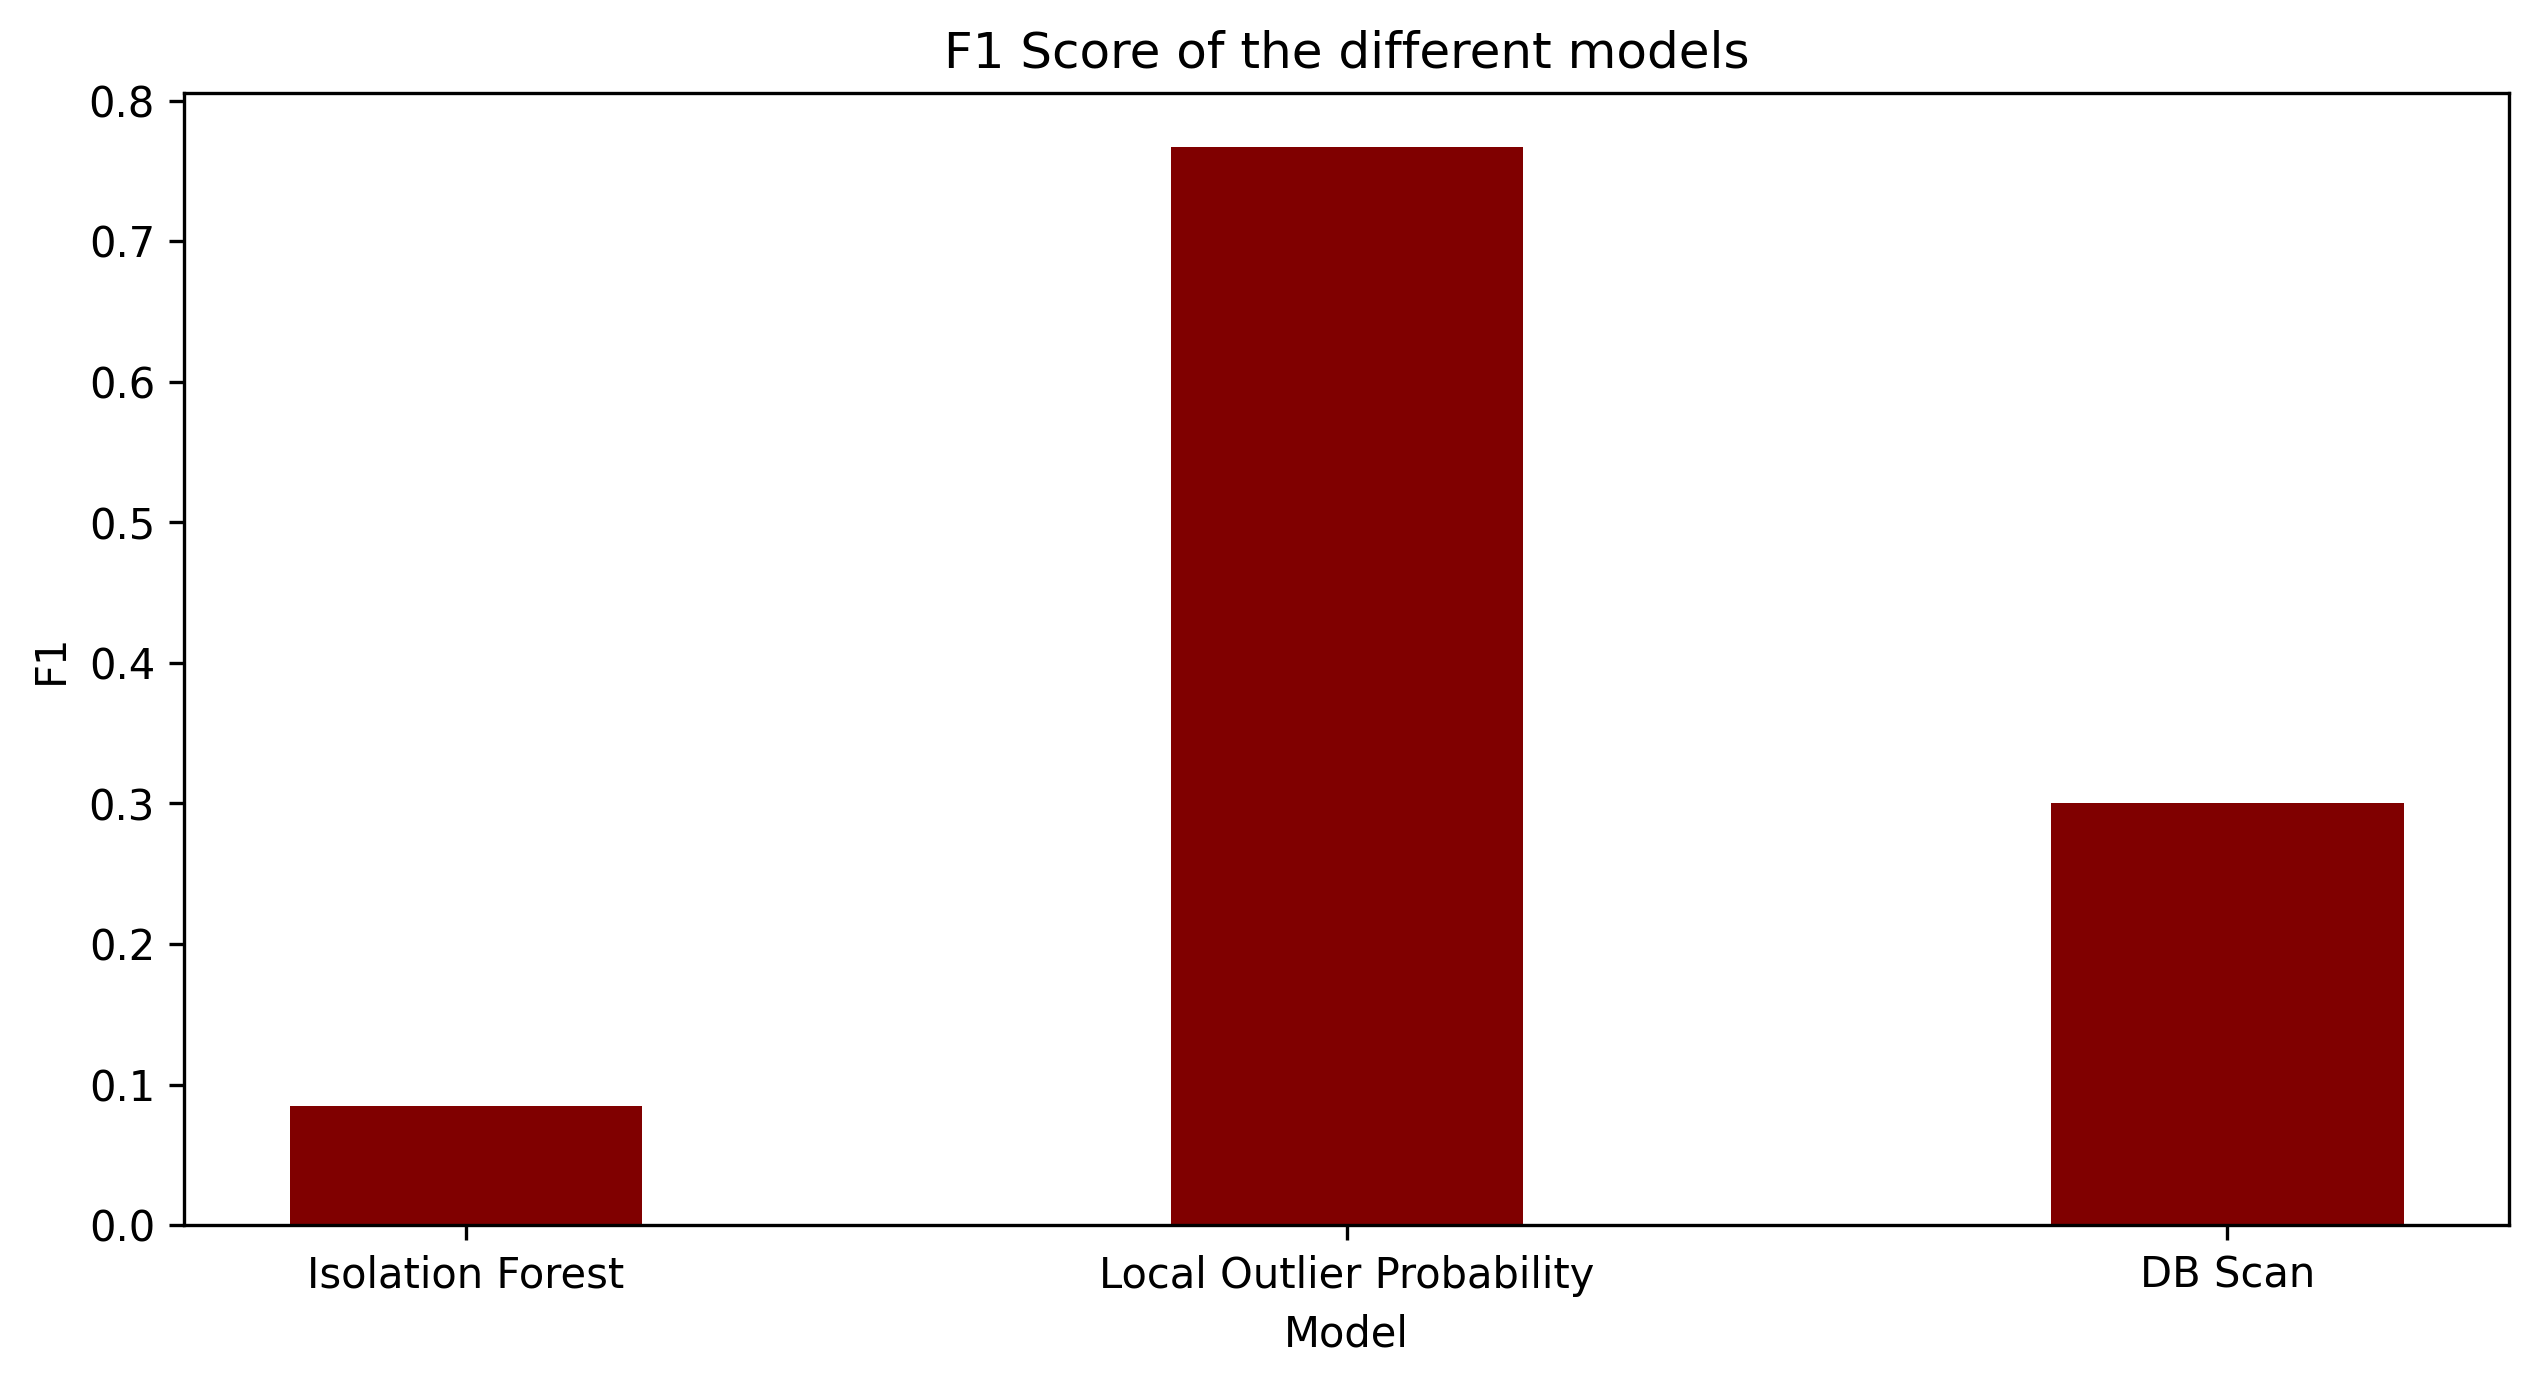

In [31]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize = (10, 5))
 
measure = "F1"

# creating the bar plot
plt.bar(results["Model"], results[measure], color ='maroon',
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel(measure)
plt.title("F1 Score of the different models")
plt.show()

In [13]:
list(percentages.columns)[1:]

['Isolation Forest', 'Local Outlier Probability', 'DB Scan', 'Own Algorithm']

In [14]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize = (10, 5))
 
measure = "F1"

# creating the bar plot
for model in list(percentages.columns)[1:]:
        plt.bar(percentages["Letter"], percentages[model], label=model,
                width = 0.4)
 
plt.xlabel("Letter")
plt.ylabel("Percentages")
#plt.title("Students enrolled in different courses")
plt.show()

In [38]:
percentages_columns = alphabet + ["Total"]
percentages.loc[results["Model"]=="Isolation Forest1", percentages_columns]  = list(iso_for.loc[iso_for["accuracy"].idxmax(), percentages_columns])
percentages.loc[results["Model"]=="Isolation Forest1", percentages_columns]  = list(iso_for.loc[iso_for["f1"].idxmax(), percentages_columns])
percentages

,Model,A,B,C,D,E,F,G,H,I,...,R,S,T,U,V,W,X,Y,Z,Total
0,Isolation Forest1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Local Outlier Probability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DB Scan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Own Algorithm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for parameter in iso_for.columns[1:5]:
    plot_results_assessment(dataframe=iso_for ,feature=parameter, output_filename=f"iso_for_results_{parameter}.pdf")

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
for column in percentages_columns:
        plt.bar(percentages.loc[percentages."Model"], percentages[column], width = 0.4, lable=column)

 
plt.xlabel("Accuracy")
plt.ylabel("Models")
#plt.title("Students enrolled in different courses")
plt.show()

Own Algo

In [19]:
path = "C:/Users/dt/Documents/CodingProjects/kddm2/Results 4,16%/results_own_algo_hyper_para_3std_4_16%.csv"

own_algo = pd.read_csv(path)
own_algo.columns

Index(['Unnamed: 0', 'IQR', 't', 'a', 'Count', 'A', 'B', 'C', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z', 'sum'],
      dtype='object')

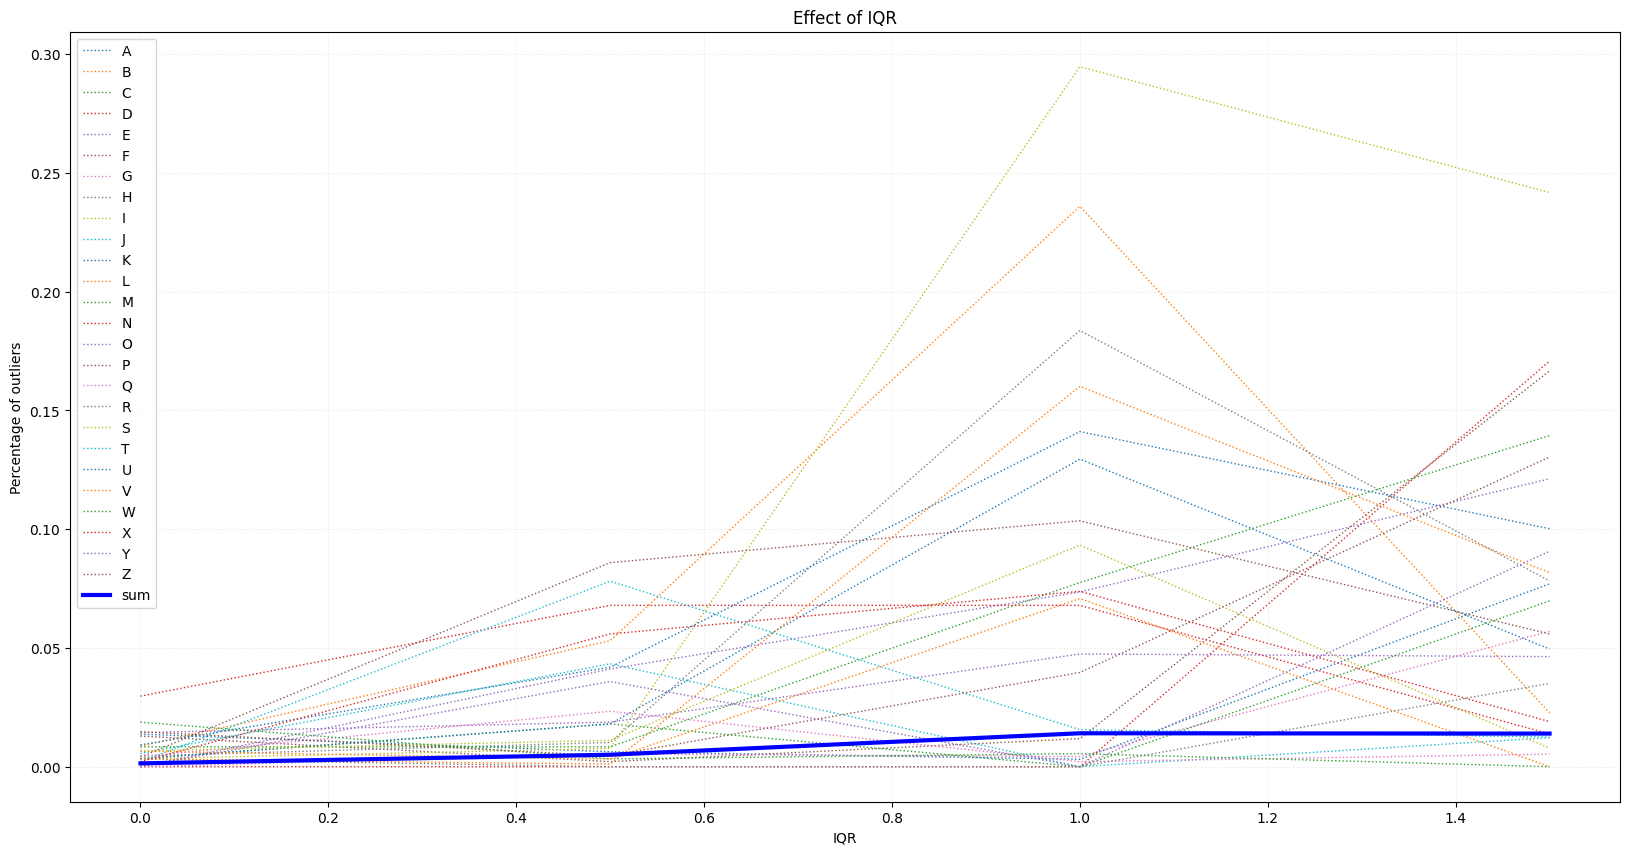

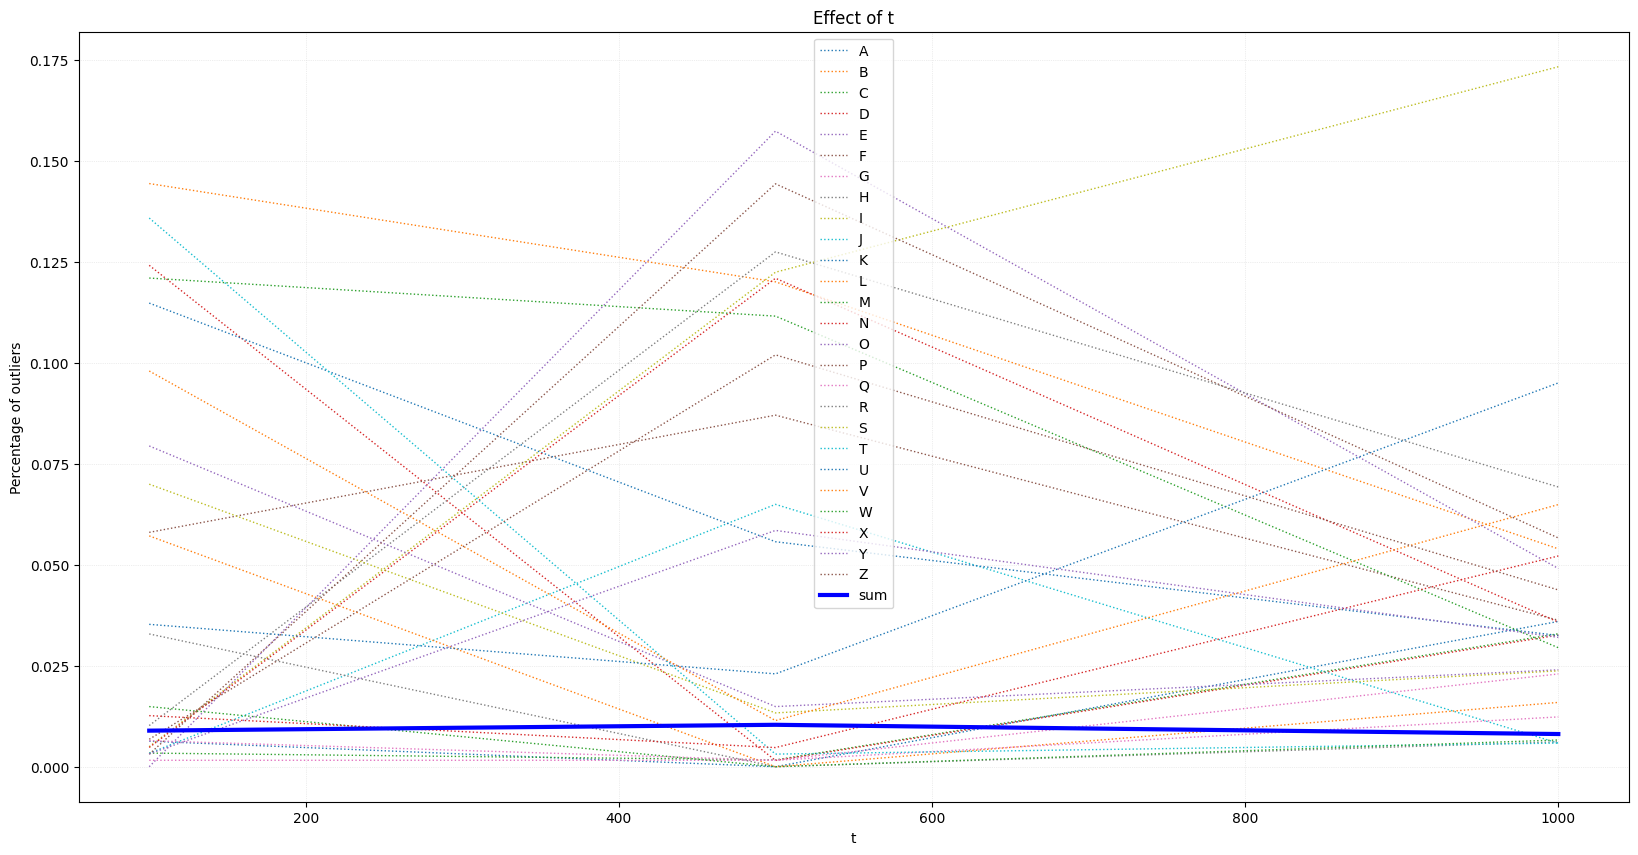

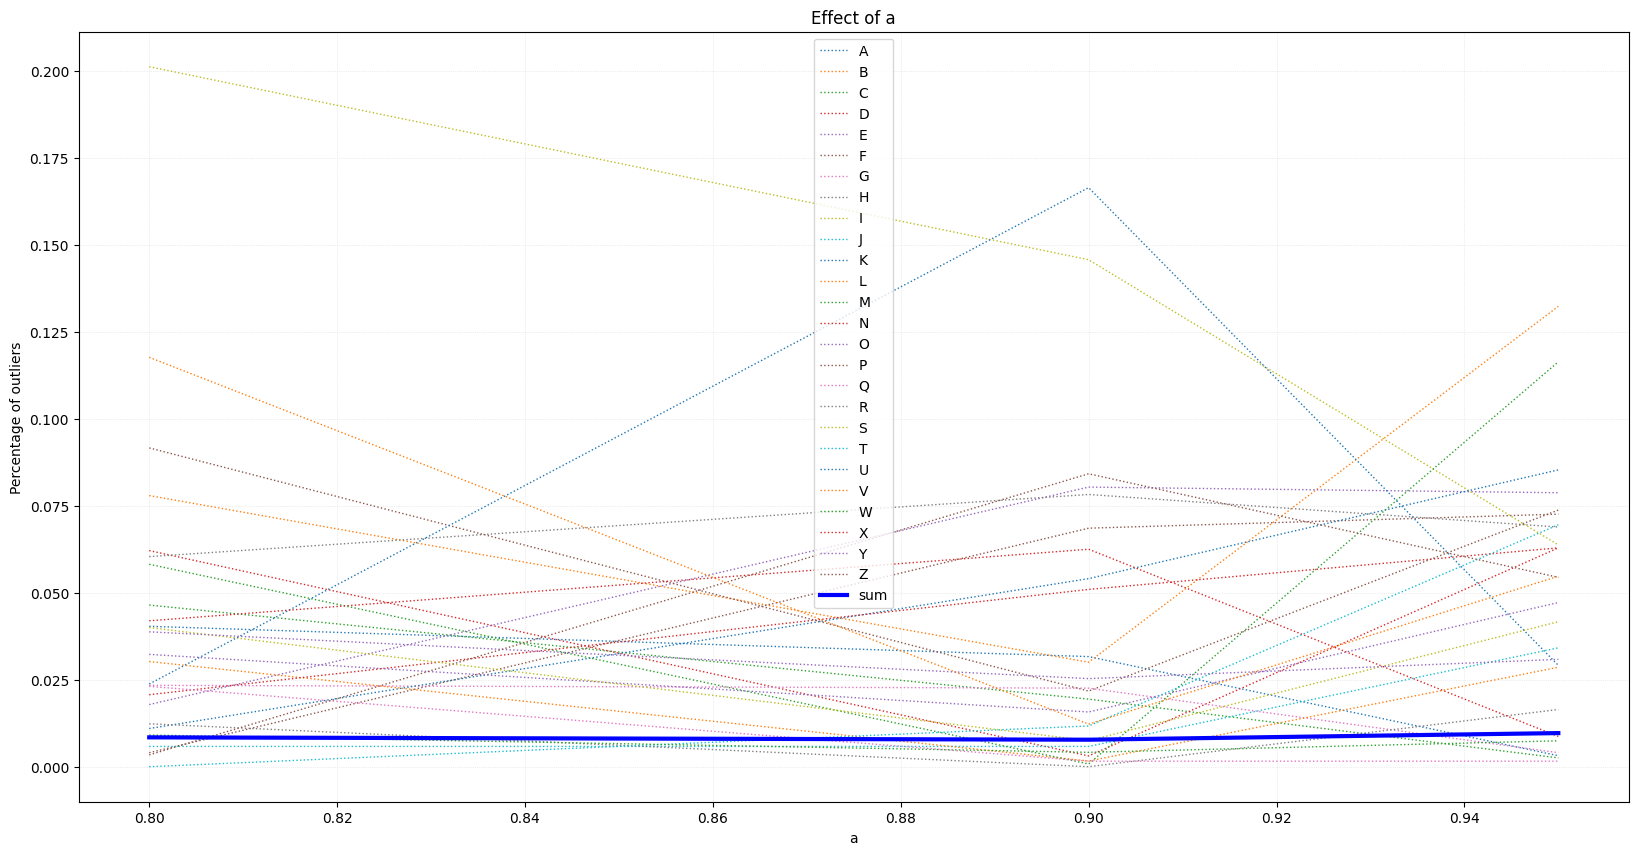

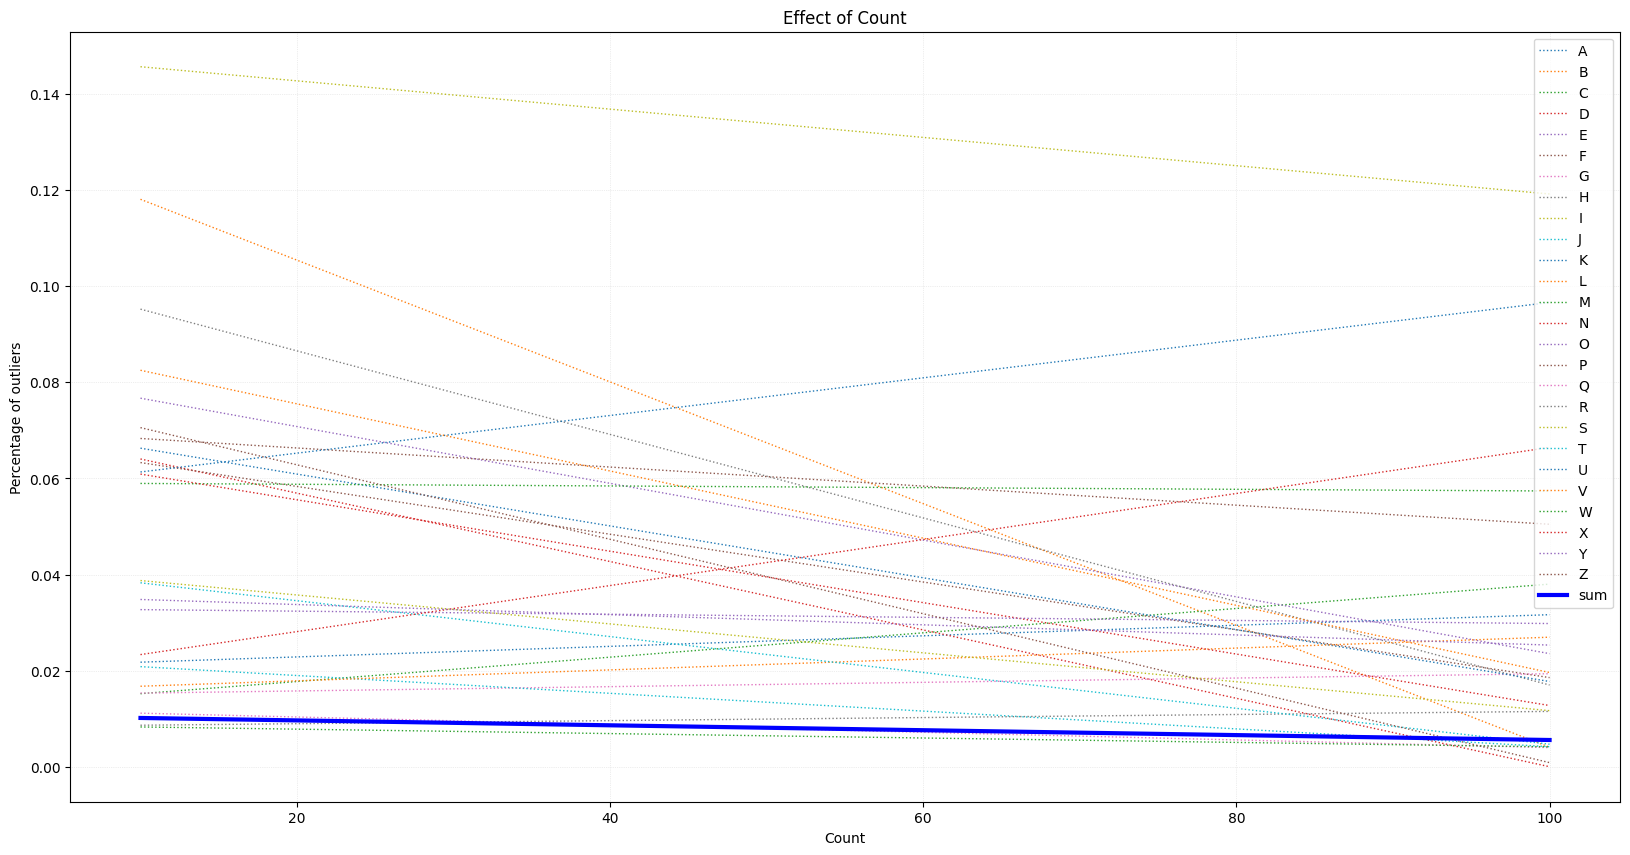

In [20]:
for parameter in own_algo.columns[1:5]:
    plot_results(feature=parameter, input_filename=path, output_filename=f"own_algo_results_{parameter}.pdf")

In [21]:
path_lop = "C:/Users/dt/Documents/CodingProjects/kddm2/Results 4,16%/results_lop_3std_4,16%_06_07.csv"

lop = pd.read_csv(path_lop)
lop

,Unnamed: 0,e,n,%,A,B,C,D,E,F,...,R,S,T,U,V,W,X,Y,Z,sum
0,0,2.0,10.0,0.60,0.048162,0.043081,0.061141,0.045963,0.041667,0.054194,...,0.044855,0.046791,0.043970,0.03690,0.047120,0.049202,0.040661,0.041985,0.043597,0.044698
1,1,2.0,10.0,0.65,0.040558,0.032637,0.052989,0.039752,0.037760,0.041290,...,0.035620,0.041444,0.041457,0.03567,0.039267,0.045213,0.038119,0.038168,0.035422,0.038548
2,2,2.0,10.0,0.70,0.036755,0.031332,0.047554,0.032298,0.037760,0.036129,...,0.032982,0.036096,0.037688,0.03198,0.036649,0.039894,0.034307,0.036896,0.029973,0.034398


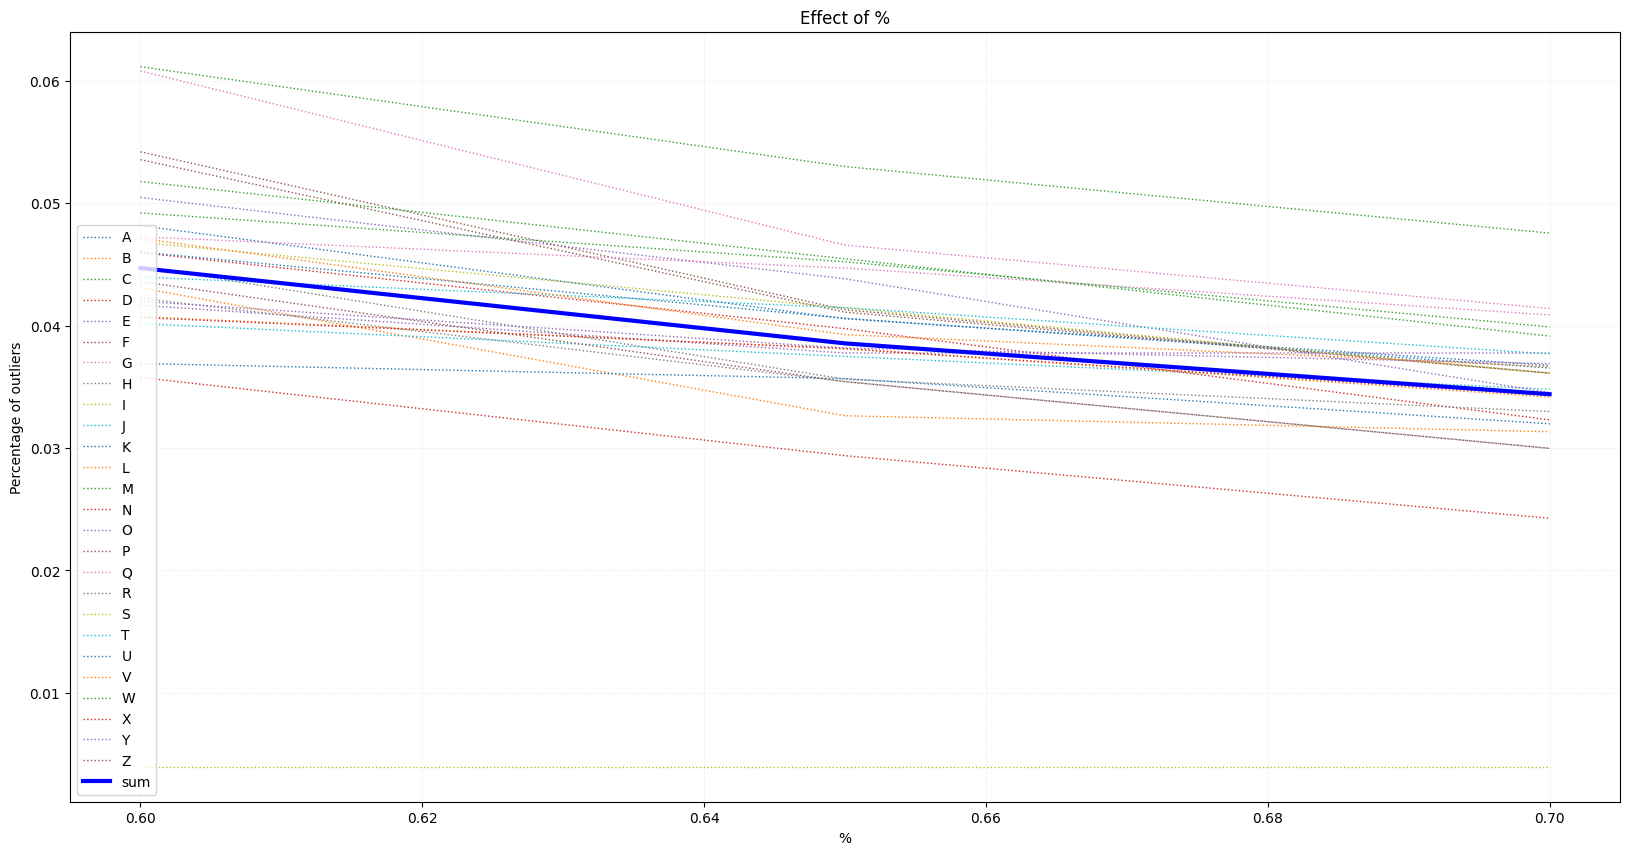

In [22]:
plot_results(feature="%", input_filename=path_lop, output_filename=f"lpp_results_{parameter}.pdf")